### Analyse the time delay and distance delay between the actual device(mobile phone) and DNSS/DTC GPS

In [1]:
import pandas as pd
import datetime
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

### using data from potong-2

In [2]:
data = pd.read_csv('../check_potong/GPS_2017.07.03 10:31:13.640-059049461.csv')
raw_time_data = pd.read_csv('../check_potong/dtc_with_speed.csv')

In [3]:
data

,log_timestamp,lat_FromGnss,lng_FromGnss,GNSS_linear_ref,GNSS_TimeStamp,lat_FromDTC,lng_FromDTC,DTC_linear_ref,DTC_TimeStamp,pong_predicted_linear_ref,bus_line,vehicle_id,type,lat_FromDevice,lng_FromDevice
0,2017.07.03 10:31:22,7.858778,98.363365,NaN,2017-07-03T09:59:58.100000+07:00,7.858783,98.363367,NaN,2017-07-03T10:31:09.637000+07:00,0.182541,2,59049461,high,7.858202,98.363712
1,2017.07.03 10:31:27,7.858778,98.363365,NaN,2017-07-03T09:59:58.100000+07:00,7.858783,98.363367,NaN,2017-07-03T10:31:09.637000+07:00,0.183010,2,59049461,high,7.858126,98.363898
2,2017.07.03 10:31:32,7.858778,98.363365,NaN,2017-07-03T09:59:58.100000+07:00,7.858783,98.363367,NaN,2017-07-03T10:31:24.677000+07:00,0.183558,2,59049461,high,7.858170,98.364169
3,2017.07.03 10:31:37,7.858160,98.364181,NaN,2017-07-03T10:31:31.733000+07:00,7.858783,98.363367,NaN,2017-07-03T10:31:24.677000+07:00,0.184040,2,59049461,high,7.858354,98.364583
4,2017.07.03 10:31:42,7.858305,98.364570,NaN,2017-07-03T10:31:36.733000+07:00,7.858783,98.363367,NaN,2017-07-03T10:31:24.677000+07:00,0.184531,2,59049461,high,7.858653,98.365005
5,2017.07.03 10:31:47,7.858514,98.364945,NaN,2017-07-03T10:31:41.223000+07:00,7.858783,98.363367,NaN,2017-07-03T10:31:24.677000+07:00,0.185010,2,59049461,high,7.858845,98.365259
6,2017.07.03 10:31:52,7.858804,98.365312,NaN,2017-07-03T10:31:46.219000+07:00,7.858583,98.363367,NaN,2017-07-03T10:31:43.040000+07:00,0.185511,2,59049461,high,7.859197,98.365740
7,2017.07.03 10:31:57,7.859109,98.365681,NaN,2017-07-03T10:31:51.579000+07:00,7.858583,98.363367,NaN,2017-07-03T10:31:43.040000+07:00,0.186019,2,59049461,high,7.859331,98.365986
8,2017.07.03 10:32:02,7.859393,98.365989,NaN,2017-07-03T10:31:55.581000+07:00,7.858583,98.363367,NaN,2017-07-03T10:31:54.805000+07:00,0.186525,2,59049461,high,7.859724,98.366472
9,2017.07.03 10:32:07,7.859808,98.366527,NaN,2017-07-03T10:32:01.980000+07:00,7.858583,98.363367,NaN,2017-07-03T10:31:54.805000+07:00,0.187082,2,59049461,high,7.860045,98.366915


In [3]:
raw_time_data

,r_time,r_timenow,r_lon,r_lat,r_speed
0,2017-07-06 17:09:11,2017-07-06 17:10:31,98.389000,7.899367,25
1,2017-07-06 17:08:16,2017-07-06 17:09:39,98.389217,7.897683,9
2,2017-07-06 17:07:19,2017-07-06 17:08:47,98.389483,7.894200,13
3,2017-07-06 17:06:27,2017-07-06 17:07:56,98.389517,7.893817,0
4,2017-07-06 17:05:30,2017-07-06 17:07:01,98.389667,7.892383,0
5,2017-07-06 17:04:35,2017-07-06 17:05:43,98.389517,7.891983,6
6,2017-07-06 17:03:37,2017-07-06 17:04:50,98.389033,7.891783,0
7,2017-07-06 17:02:45,2017-07-06 17:04:00,98.388600,7.891883,0
8,2017-07-06 17:01:46,2017-07-06 17:03:09,98.388533,7.891867,10
9,2017-07-06 17:00:56,2017-07-06 17:02:15,98.387000,7.891683,22


### Extract and merge data from 'raw_time_data' to 'data'

In [4]:
dtc_data = raw_time_data[(raw_time_data['r_time'] > '2017-07-03 10:00') & (raw_time_data['r_time'] < '2017-07-03 11:30')]

raw_time = []
found = []
speed = []
for d in data.iterrows():
    matched = dtc_data[dtc_data['r_lat'] == d[1]['lat_FromDTC']]
    raw_time.append(matched.iloc[-1, :]['r_time'])
    speed.append(matched.iloc[-1, :]['r_speed'])
    found.append(matched.shape[0])

data['dtc_raw_time'] = raw_time
data['dtc_speed'] = speed
data['dtc_raw_time'] = pd.to_datetime(data['dtc_raw_time'])

## Analyse time delay

In [5]:
data['log_timestamp'] = pd.to_datetime(data['log_timestamp'])
data['GNSS_TimeStamp'] = pd.to_datetime(data['GNSS_TimeStamp'])
data['DTC_TimeStamp'] = pd.to_datetime(data['DTC_TimeStamp'])

seven_hour = datetime.timedelta(hours=7)

In [8]:
gnss_diff = data['log_timestamp'] - data['GNSS_TimeStamp'] - seven_hour
dtc_diff = data['log_timestamp'] - data['dtc_raw_time']

In [11]:
print("delay from GNSS - mean: {} seconds, std: {} seconds".format(gnss_diff.iloc[21:].mean(), gnss_diff.iloc[21:].std()))
print("delay from DTC - mean: {} seconds, std: {} seconds".format(dtc_diff[6:].mean(), dtc_diff[6:].std()))

delay from GNSS - mean: 0 days 00:00:06.301674 seconds, std: 0 days 00:00:00.546374 seconds
delay from DTC - mean: 0 days 00:02:06.567567 seconds, std: 0 days 00:00:35.005759 seconds


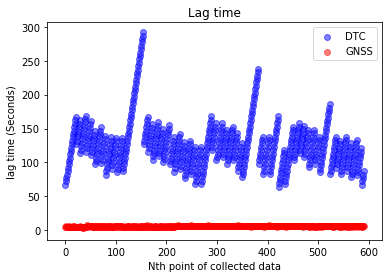

In [13]:
plt.scatter(range(len(dtc_diff)-6), dtc_diff[6:].dt.seconds, c='blue', alpha=0.5, label="DTC")
plt.scatter(range(len(gnss_diff)-6), gnss_diff[6:].dt.seconds, c='red', alpha=0.5, label="GNSS")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag time (Seconds)")
plt.title("Lag time")
plt.legend()
plt.show()

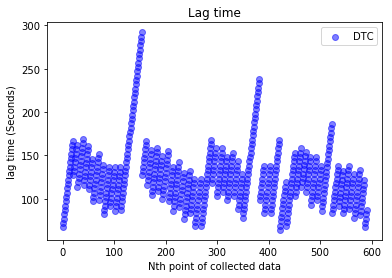

In [14]:
plt.scatter(range(len(dtc_diff)-6), dtc_diff[6:].dt.seconds, c='blue', alpha=0.5, label="DTC")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag time (Seconds)")
plt.title("DTC Lag time")
plt.legend()
plt.show()

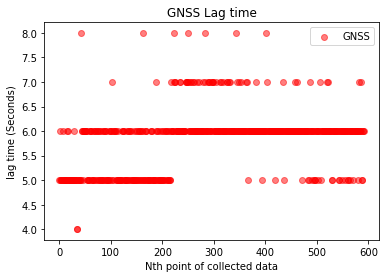

In [15]:
plt.scatter(range(len(gnss_diff)-6), gnss_diff[6:].dt.seconds, c='red', alpha=0.5, label="GNSS")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag time (Seconds)")
plt.title("GNSS Lag time")
plt.legend()
plt.show()

### if the bus is moving with 40km/hr, in 126 seconds, it will go ...... meters

In [16]:
40*1000/60/60 * 126

1400.0

### if the bus is moving with 40km/hr, in 6 seconds, it will go ...... meters

In [30]:
40*1000/60/60 * 6

66.66666666666666

## Analyse the distance delay

### transforming lat/lng to linear_ref in order to calculate meter lag through API (take considerable time)

In [31]:
#linref = []
#
#import time
#
#for i in range(data.shape[0]):
##for i in range(100):
#    lat, lng = data.loc[i, ['lat_FromGnss', 'lng_FromGnss']]
#    req = requests.get('https://api.traffy.xyz/v0/route/583/linear_ref/?coords={},{}'.format(lng, lat)).json()
#    lin_gnss = req['location']['linear_ref']
#    
#    lat, lng = data.loc[i, ['lat_FromDTC', 'lng_FromDTC']]
#    req = requests.get('https://api.traffy.xyz/v0/route/583/linear_ref/?coords={},{}'.format(lng, lat)).json()
#    lin_dtc = req['location']['linear_ref']
#    
#    lat, lng = data.loc[i, ['lat_FromDevice', 'lng_FromDevice']]
#    req = requests.get('https://api.traffy.xyz/v0/route/583/linear_ref/?coords={},{}'.format(lng, lat)).json()
#    lin_device = req['location']['linear_ref']
#
#    linref.append([lin_gnss, lin_dtc, lin_device])
#    print('round ' + str(i) )
#    time.sleep(1)
#
#
#with open('pickled-lag/linref','wb') as f:
#    pickle.dump(linref,f)

round 0
round 1
round 2
round 3
round 4
round 5
round 6
round 7
round 8
round 9
round 10
round 11
round 12
round 13
round 14
round 15
round 16
round 17
round 18
round 19
round 20
round 21
round 22
round 23
round 24
round 25
round 26
round 27
round 28
round 29
round 30
round 31
round 32
round 33
round 34
round 35
round 36
round 37
round 38
round 39
round 40
round 41
round 42
round 43
round 44
round 45
round 46
round 47
round 48
round 49
round 50
round 51
round 52
round 53
round 54
round 55
round 56
round 57
round 58
round 59
round 60
round 61
round 62
round 63
round 64
round 65
round 66
round 67
round 68
round 69
round 70
round 71
round 72
round 73
round 74
round 75
round 76
round 77
round 78
round 79
round 80
round 81
round 82
round 83
round 84
round 85
round 86
round 87
round 88
round 89
round 90
round 91
round 92
round 93
round 94
round 95
round 96
round 97
round 98
round 99


In [18]:
linref = pickle.load(open('../pickled-lag/linref', 'rb'))

In [34]:
lin_collected = pd.DataFrame(linref, columns=('gnss', 'dtc', 'device'))

## Use Machine Learning to predict Location from DTC Data

In [30]:
def import_model(filename):
    return joblib.load('../pickled-data/'+filename+'.pkl')

# def get_day_of_week(dt):
#     return dt.weekday()

# def get_hour(dt):
#     return dt.hour

In [31]:
[regressor, labelencoder, onehotencoder] = import_model('potong-2')

### Cleaning data

In [32]:
dtc_time_utc = data['dtc_raw_time'] - seven_hour
linref = np.array(linref)

dtc_test_set = pd.DataFrame()
dtc_test_set['direction'] = ['out'] * 598
dtc_test_set['day_of_week'] = dtc_time_utc.apply(lambda d: d.weekday())
dtc_test_set['hour'] = dtc_time_utc.apply(lambda d: d.hour)
dtc_test_set['speed'] = speed
dtc_test_set['linear_ref'] = linref[:, 1]
dtc_test_set['second_from_last_point'] = dtc_diff.apply(lambda d: d.seconds)

dtc_test_set.loc[:, 'direction'] = labelencoder.transform(dtc_test_set.loc[:, 'direction'])
dtc_test_set = onehotencoder.transform(dtc_test_set).toarray()
dtc_test_set = dtc_test_set[:, 1:]

### predict location

In [33]:
dtc_predict = []
for dtc_point in dtc_test_set:
    dtc_predict.append(regressor.predict([dtc_point]))

dtc_predict = np.array(dtc_predict)

### use 13883 meters as an approximate distance for a half round (linear_ref=0 to linear_ref=1)

In [36]:
diff_gnss = lin_collected['gnss'] - lin_collected['device']
diff_dtc = lin_collected['dtc'] - lin_collected['device']
diff_predicted_dtc = dtc_predict[:, 0] - lin_collected['device']

In [37]:
diff_gnss_meter = diff_gnss * 13883
diff_dtc_meter = diff_dtc * 13883
diff_predicted_dtc_meter = diff_predicted_dtc * 13883

In [38]:
print("delay from GNSS - mean: {} meters, std: {} meters".format(diff_gnss_meter.mean(), diff_gnss_meter.std()))
print("delay from DTC - mean: {} meters, std: {} meters".format(diff_dtc_meter.mean(), diff_dtc_meter.std()))
print("delay from predicted DTC - mean: {} meters, std: {} meters".format(diff_predicted_dtc_meter.mean(), diff_predicted_dtc_meter.std()))

delay from GNSS - mean: -9.546025755977597 meters, std: 28.20366227955011 meters
delay from DTC - mean: -475.2244319970847 meters, std: 293.93169468138984 meters
delay from predicted DTC - mean: 251.49988237580706 meters, std: 916.1150893083866 meters


In [49]:
def runningMean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

In [56]:
rm_dtc = runningMean(diff_dtc_meter[6:].abs(), 592)
rm_p_dtc = runningMean(np.absolute(diff_predicted_dtc_meter[6:]), 592)

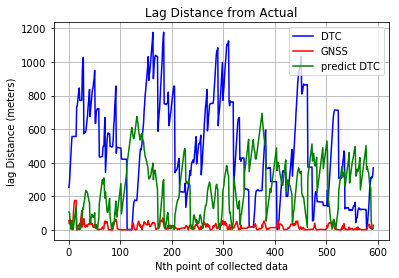

In [58]:
plt.plot(range(598-6), diff_dtc_meter[6:].abs(), c='blue', label="DTC")
plt.plot(range(598-6), diff_gnss_meter[6:].abs(), c='red', label="GNSS")
plt.plot(range(598-6), np.absolute(diff_predicted_dtc_meter[6:]), c='green', label="predict DTC")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag Distance (meters)")
plt.title("Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

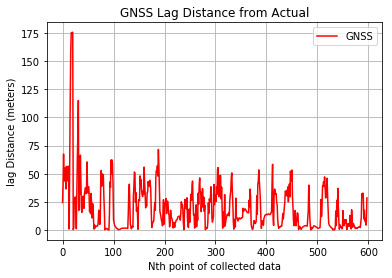

In [43]:
plt.plot(range(598), diff_gnss_meter.abs(), c='red', label="GNSS")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag Distance (meters)")
plt.title("GNSS Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

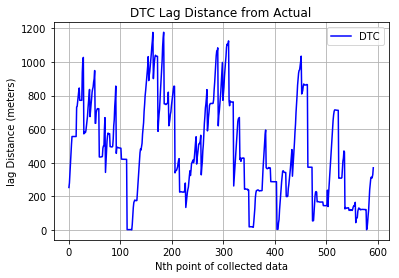

In [47]:
plt.plot(range(598-6), diff_dtc_meter[6:].abs(), c='blue', label="DTC")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag Distance (meters)")
plt.title("DTC Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()

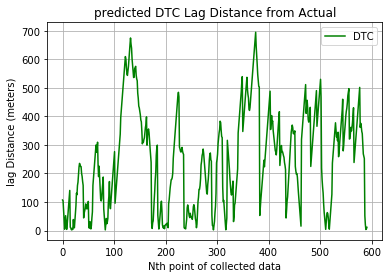

In [48]:
plt.plot(range(598-6), np.absolute(diff_predicted_dtc_meter[6:]), c='green', label="DTC")
plt.xlabel("Nth point of collected data")
plt.ylabel("lag Distance (meters)")
plt.title("predicted DTC Lag Distance from Actual")
plt.legend()
plt.grid()
plt.show()